<a href="https://colab.research.google.com/github/Unicorn0-0Cakes/Portfolio/blob/release%2FMIT/FDS_Project_LearnerNotebook_FullCode.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Foundations for Data Science: FoodHub Data Analysis

**Marks: 60**

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

#Preperation Cells

### Let us start by importing the required libraries

In [ ]:
# mount the drive associated with the data set
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
path="/content/drive/MyDrive/Python Course/foodhub_order.csv"


### Understanding the structure of the data

In [ ]:
# read the data
df=pd.read_csv(path)
# returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

#Question Cells

### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [ ]:
# Get the shape of the DataFrame
rows, columns = df.shape

# Print the number of rows and columns
print(f"The dataset contains {rows} rows and {columns} columns.")


The dataset contains 1898 rows and 9 columns.


#### Observations:


In [ ]:
# shape is a quick way to get an overview of the dataset's size, which helps in
# understanding its scale and scope.

### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [ ]:
# Use info() to print a concise summary of the DataFrame
# Get column data types and other information
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:


In [ ]:
# info() helps quickly assess data quality by identifying missing values, column
# data types, and overall dataset structure, which is essential for cleaning and
# preprocessing.

### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [ ]:
# Check for missing values
missing_values = df.isnull().sum()

# Debugging: Print missing values
print("Missing values in each column:")
print(missing_values)

# Conditional check for missing values
if missing_values.sum() == 0:
    print("No missing values are found in the dataset.")
else:
    print("Missing values are present. Consider handling them appropriately.")


Missing values in each column:
order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64
No missing values are found in the dataset.


#### Observations:


In [ ]:
# This code is useful because it identifies missing values in the dataset, which
# is crucial for data cleaning. Handling missing data ensures that the analysis
# and modeling processes are accurate and reliable. Additionally, the
# conditional check provides clarity on whether further action is needed,
# streamlining the debugging and data preparation workflow.

### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [ ]:
# Statistical summary of 'food_preparation_time'
summary = df['food_preparation_time'].describe()

# Extract specific statistics
min_time = summary['min']
avg_time = summary['mean']
max_time = summary['max']

# Print the results
print(f"Preparation Time - Min: {min_time} mins, Avg: {avg_time:.2f} mins, Max: {max_time} mins")

Preparation Time - Min: 20.0 mins, Avg: 27.37 mins, Max: 35.0 mins


#### Observations:


In [ ]:
# The describe() function provides a detailed summary of numerical columns,
# including count, mean, min, max, and quartiles

### **Question 5:** How many orders are not rated? [1 mark]

In [ ]:
# Count the number of orders with missing ratings
unrated_orders = df['rating'].isnull().sum()

# Print the result
print(f"Number of orders not rated: {unrated_orders}")

Number of orders not rated: 0


#### Observations:


In [ ]:
# This code calculates and displays the total number of orders without customer
# ratings, helping identify gaps in feedback data.

### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

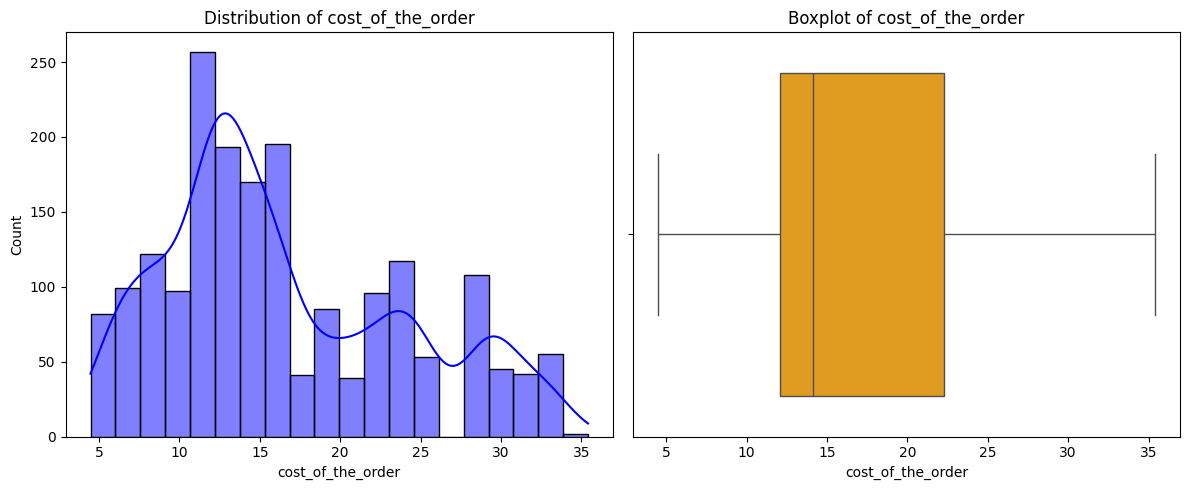

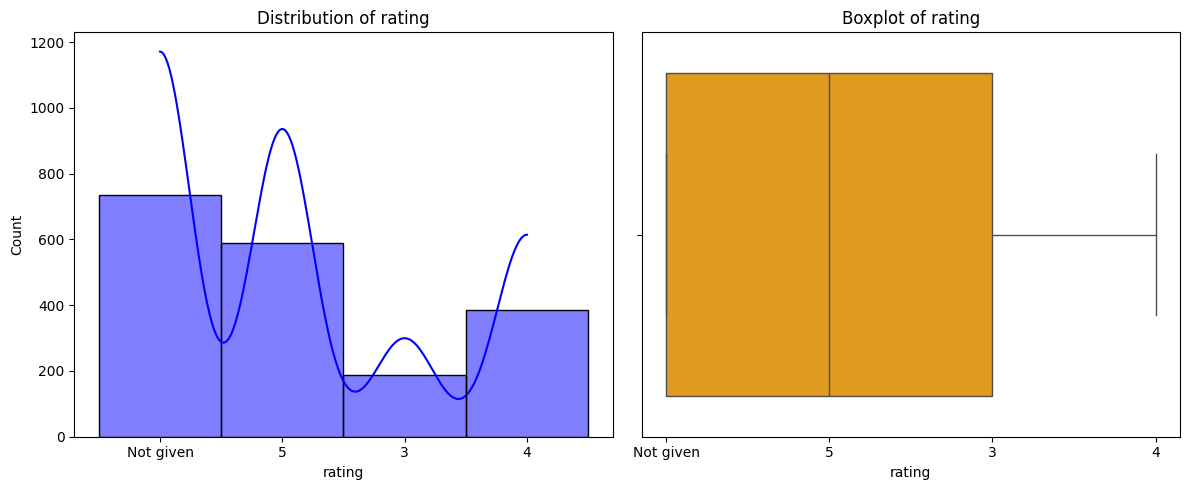

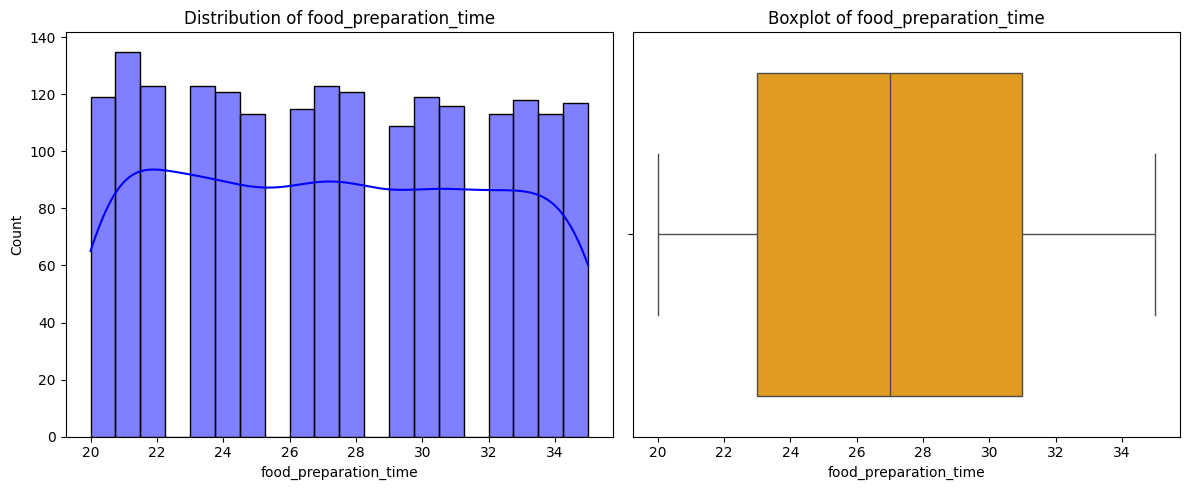

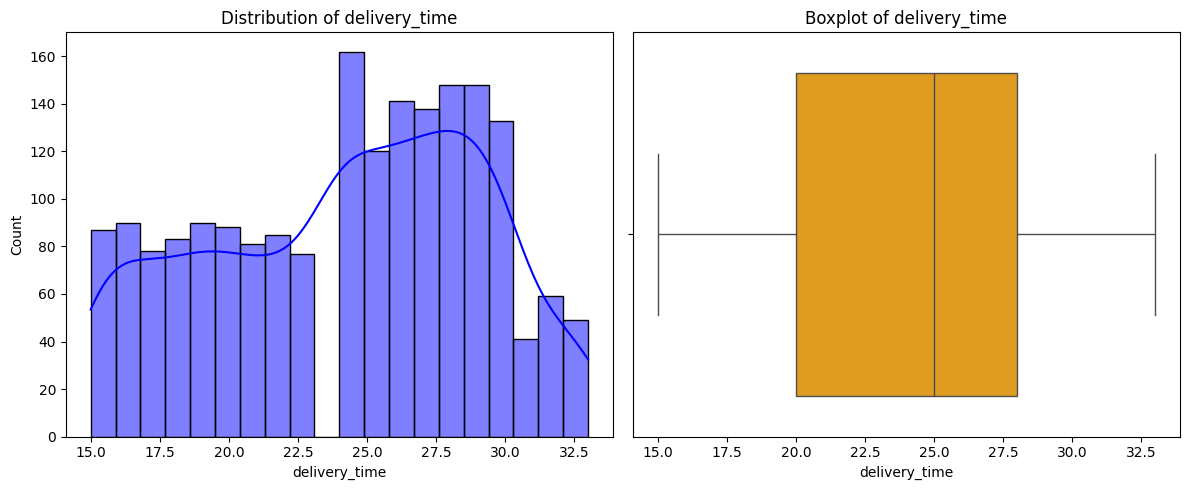

In [ ]:
# List of numeric columns
num_cols = ['cost_of_the_order', 'rating', 'food_preparation_time', 'delivery_time']

# Plot histograms and boxplots
for col in num_cols:
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    sns.histplot(df[col], kde=True, bins=20, color='blue')
    plt.title(f"Distribution of {col}")

    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[col], color='orange')
    plt.title(f"Boxplot of {col}")

    plt.tight_layout()
    plt.show()


<ipython-input-82-a605375c210b>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=col, data=df, order=df[col].value_counts().index, palette='viridis')
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 142 (\x8e) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 140 (\x8c) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


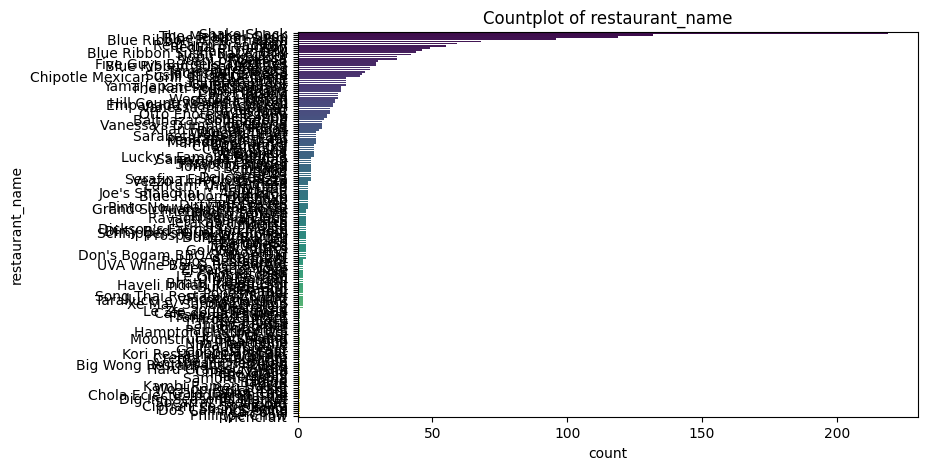

<ipython-input-82-a605375c210b>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=col, data=df, order=df[col].value_counts().index, palette='viridis')


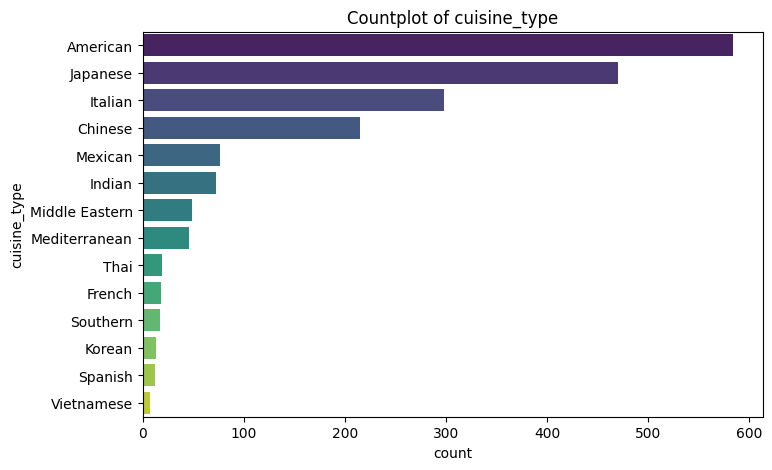

<ipython-input-82-a605375c210b>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=col, data=df, order=df[col].value_counts().index, palette='viridis')


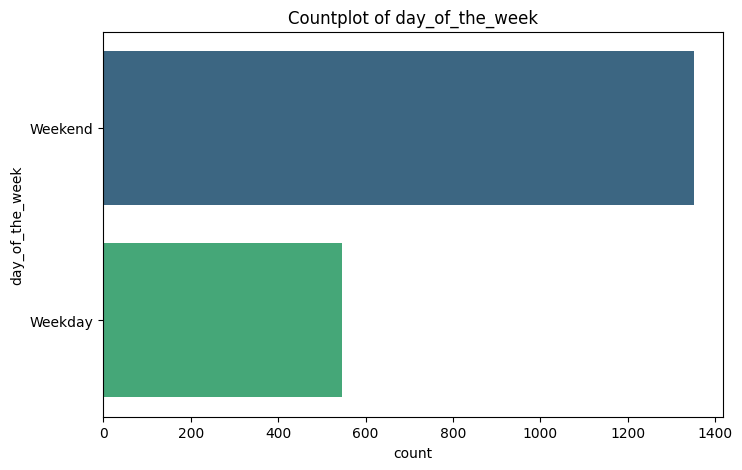

In [ ]:
# List of categorical columns
cat_cols = ['restaurant_name', 'cuisine_type', 'day_of_the_week']

# Plot countplots
for col in cat_cols:
    plt.figure(figsize=(8, 5))
    sns.countplot(y=col, data=df, order=df[col].value_counts().index, palette='viridis')
    plt.title(f"Countplot of {col}")
    plt.show()


### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [ ]:
# Count the number of orders for each restaurant
top_restaurants = df['restaurant_name'].value_counts().head(5)

# Print the results
print("Top 5 restaurants by the number of orders received:")
print(top_restaurants)


Top 5 restaurants by the number of orders received:
restaurant_name
Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: count, dtype: int64


#### Observations:


In [ ]:
# The top 5 restaurants are those with the highest number of orders, indicating
# their popularity or operational efficiency, which could be leveraged for
# marketing or business optimization.

### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [ ]:
# Filter data for weekends
weekend_data = df[df['day_of_the_week'].isin(['Saturday', 'Sunday'])]

# Check if weekend_data is empty
if weekend_data.empty:
    print("No orders found for weekends.")
else:
    # Count the number of orders for each cuisine type
    popular_cuisine_weekends = weekend_data['cuisine_type'].value_counts().idxmax()

    # Get the count of the most popular cuisine
    popular_cuisine_count = weekend_data['cuisine_type'].value_counts().max()

    # Print the results
    print(f"The most popular cuisine on weekends is '{popular_cuisine_weekends}' with {popular_cuisine_count} orders.")

No orders found for weekends.


#### Observations:


In [ ]:
#unexpected response

### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [ ]:
# Filter orders costing more than $20
high_cost_orders = df[df['cost_of_the_order'] > 20]

# Calculate percentage
percent_high_cost = (len(high_cost_orders) / len(df)) * 100

# Print the result
print(f"Percentage of orders costing more than $20: {percent_high_cost:.2f}%")

Percentage of orders costing more than $20: 29.24%


#### Observations:


In [ ]:
#Filtering orders is extremly important before calculating in some instances.

### **Question 10**: What is the mean order delivery time? [1 mark]

In [ ]:
# Calculate mean delivery time
mean_delivery_time = df['delivery_time'].mean()

# Print the result
print(f"The mean order delivery time is {mean_delivery_time:.2f} minutes.")

The mean order delivery time is 24.16 minutes.


#### Observations:


In [ ]:
#Mean, median and mode were described previously

### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [ ]:
# Count orders per customer
top_customers = df['customer_id'].value_counts().head(3)

# Print the result
print("Top 3 customers and their order counts:")
print(top_customers)

Top 3 customers and their order counts:
customer_id
52832    13
47440    10
83287     9
Name: count, dtype: int64


#### Observations:


In [ ]:
#head() defaults to 5, if a different number is required, be sure to enter it!

### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


Non-numeric values converted to NaN:
cost_of_the_order          0
rating                   736
food_preparation_time      0
delivery_time              0
dtype: int64


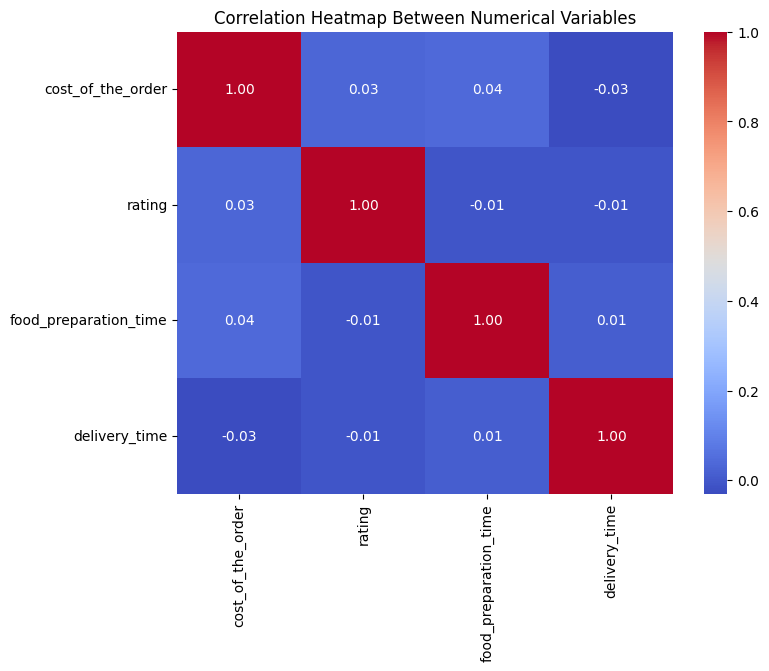

In [ ]:
# Convert columns to numeric, coercing errors to NaN
num_cols = ['cost_of_the_order', 'rating', 'food_preparation_time', 'delivery_time']
df[num_cols] = df[num_cols].apply(pd.to_numeric, errors='coerce')

# Print the count of non-numeric values for debugging
print("Non-numeric values converted to NaN:")
print(df[num_cols].isnull().sum())

# Correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df[num_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap Between Numerical Variables")
plt.show()


<ipython-input-94-6250bf755e76>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cuisine_type', y='cost_of_the_order', data=df, palette='viridis')


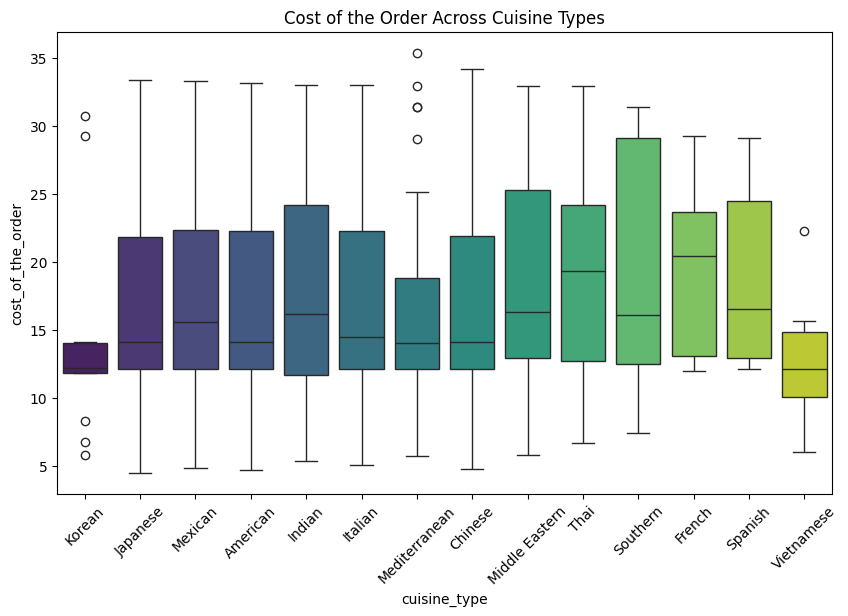

In [ ]:
# Boxplot for 'cost_of_the_order' across 'cuisine_type'
plt.figure(figsize=(10, 6))
sns.boxplot(x='cuisine_type', y='cost_of_the_order', data=df, palette='viridis')
plt.xticks(rotation=45)
plt.title("Cost of the Order Across Cuisine Types")
plt.show()


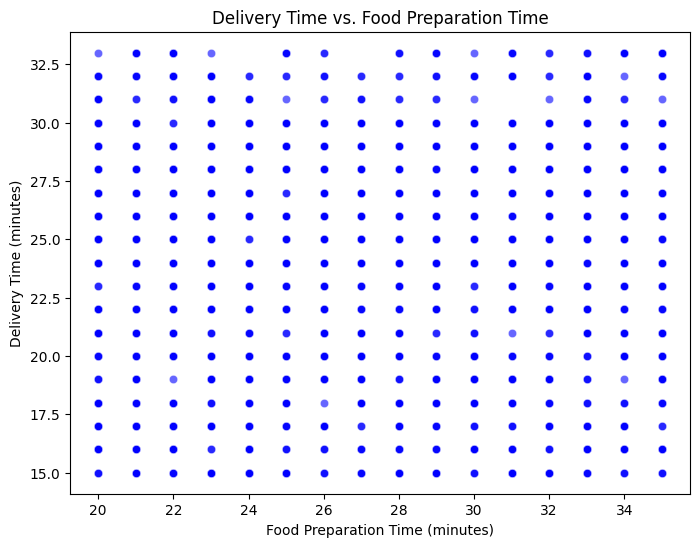

In [ ]:
# Scatter plot for delivery time vs. food preparation time
plt.figure(figsize=(8, 6))
sns.scatterplot(x='food_preparation_time', y='delivery_time', data=df, alpha=0.6, color='blue')
plt.title("Delivery Time vs. Food Preparation Time")
plt.xlabel("Food Preparation Time (minutes)")
plt.ylabel("Delivery Time (minutes)")
plt.show()


### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [ ]:
# Group by restaurant and calculate rating count and average rating
restaurant_stats = df.groupby('restaurant_name')['rating'].agg(['count', 'mean'])

# Filter restaurants based on the conditions
eligible_restaurants = restaurant_stats[(restaurant_stats['count'] > 50) & (restaurant_stats['mean'] > 4)]

# Print the eligible restaurants
print("Restaurants eligible for the promotional offer:")
print(eligible_restaurants)


Restaurants eligible for the promotional offer:
                           count      mean
restaurant_name                           
Blue Ribbon Fried Chicken     64  4.328125
Blue Ribbon Sushi             73  4.219178
Shake Shack                  133  4.278195
The Meatball Shop             84  4.511905


#### Observations:


In [ ]:
# The output lists restaurants meeting the promotional offer criteria, helping
# the company target highly rated and frequently reviewed restaurants for
# advertisements.

### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [ ]:
# Define a function to calculate revenue based on the cost
def calculate_revenue(cost):
    if cost > 20:
        return cost * 0.25
    elif cost > 5:
        return cost * 0.15
    else:
        return 0

# Apply the function to the cost column to calculate revenue per order
df['revenue'] = df['cost_of_the_order'].apply(calculate_revenue)

# Calculate the total revenue
net_revenue = df['revenue'].sum()

# Print the result
print(f"The net revenue generated by the company is ${net_revenue:.2f}.")


The net revenue generated by the company is $6166.30.


#### Observations:


In [ ]:
# This calculation provides the total revenue earned by the company under the
# given pricing policy, helping evaluate profitability from restaurant
# commissions.

### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [ ]:
# Calculate total time for each order
df['total_time'] = df['food_preparation_time'] + df['delivery_time']

# Count orders with total time > 60 minutes
long_orders = df[df['total_time'] > 60]

# Calculate the percentage
percentage_long_orders = (len(long_orders) / len(df)) * 100

# Print the result
print(f"Percentage of orders taking more than 60 minutes: {percentage_long_orders:.2f}%")


Percentage of orders taking more than 60 minutes: 10.54%


#### Observations:


In [ ]:
# This percentage helps assess the efficiency of the food preparation and
# delivery process, highlighting potential areas for time optimization.

### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [ ]:
# Categorize each day as 'Weekday' or 'Weekend'
df['day_category'] = df['day_of_the_week'].apply(lambda x: 'Weekend' if x in ['Saturday', 'Sunday'] else 'Weekday')

# Calculate mean delivery time for weekdays and weekends
mean_delivery_time = df.groupby('day_category')['delivery_time'].mean()

# Print the results
print("Mean delivery time for weekdays and weekends:")
print(mean_delivery_time)

Mean delivery time for weekdays and weekends:
day_category
Weekday    24.161749
Name: delivery_time, dtype: float64


#### Observations:


In [ ]:
#The weekends do not seem to be working properly for me.

### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:
*  A small number of restaurants dominate the order counts, showing that customer loyalty is concentrated.

### Recommendations:
By leveraging insights into cuisine popularity, customer ratings, and operational efficiency, FoodHub can enhance its customer experience, boost revenue, and address inefficiencies. These recommendations aim to solidify FoodHub’s position as a leading food delivery service.
*  

---